In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\debas\Downloads\archive (1)\spam.csv", encoding='latin')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2702,ham,"Omw back to tampa from west palm, you hear wha...",NaN,NaN,NaN
642,ham,Probably gonna swing by in a wee bit,NaN,NaN,NaN
5411,ham,I ask if u meeting da ge tmr nite...,NaN,NaN,NaN
2272,ham,"Haha awesome, I've been to 4u a couple times. ...",NaN,NaN,NaN
2156,ham,Hey cutie. How goes it? Here in WALES its kind...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Steps to cover-
1. Data Cleaning
2. EDA
3. text Processing
4. Model Building
5. Evaluation

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

403

In [9]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
# transforming the target variable into numeric
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

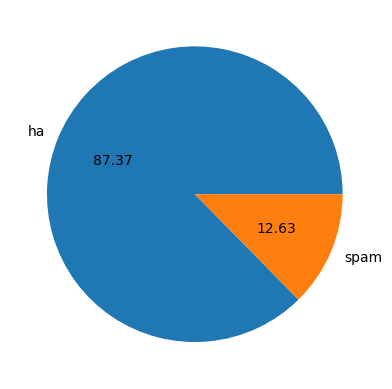

In [15]:
plt.pie(df['target'].value_counts(), labels=['ha','spam'],autopct="%0.2f")
plt.show()

Therefore,Imbalanced Data

In [16]:
import nltk

In [17]:
# number of characters in each message
df['num_characters'] = df['text'].apply(lambda x:len(x))


In [18]:
# no of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
# no of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

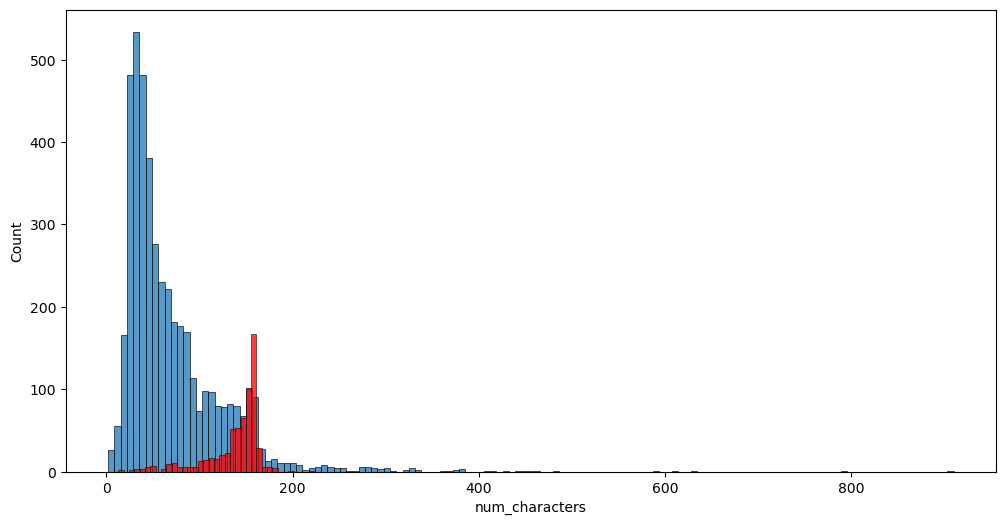

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

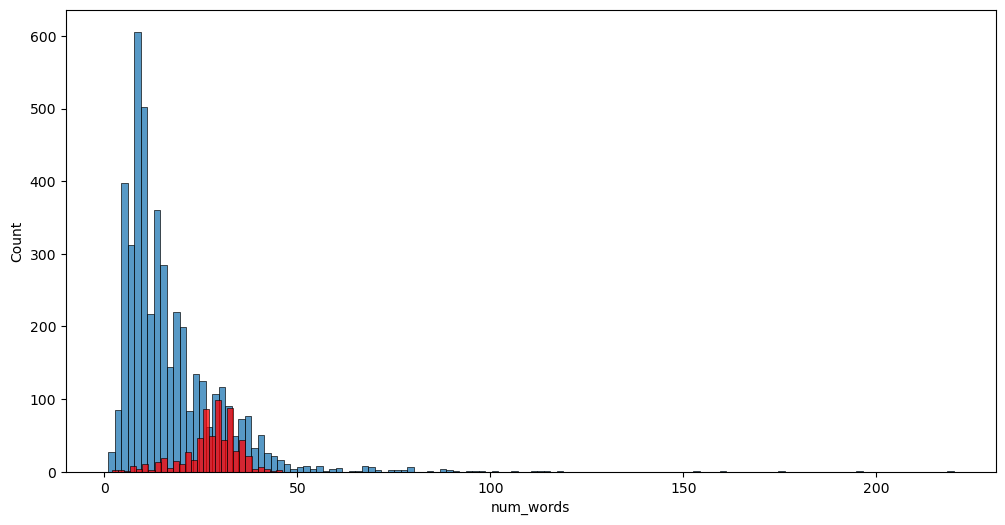

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

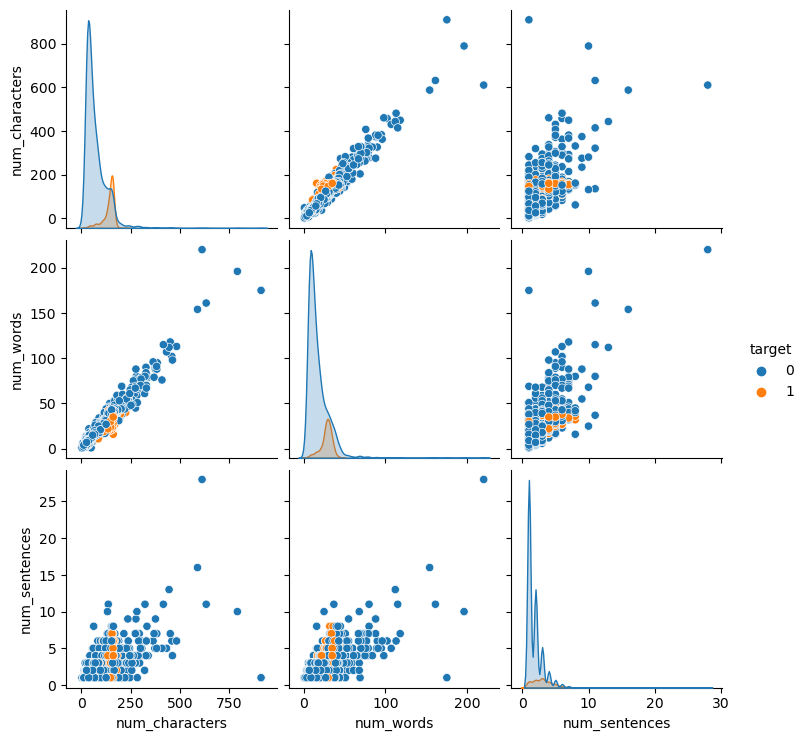

In [27]:
sns.pairplot(df,hue='target')

In [28]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

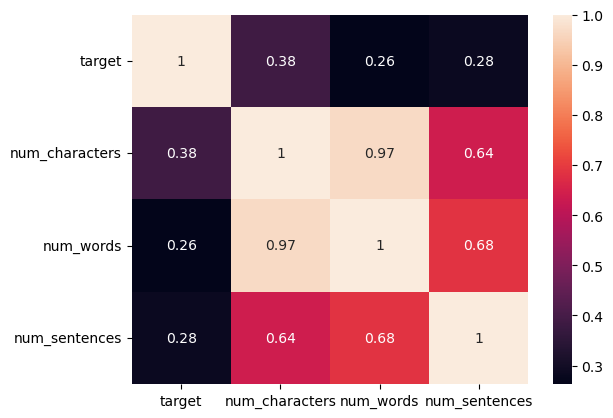

In [29]:
sns.heatmap(df.corr(),annot=True)                    #annotation=True means shows values of correlation

In [30]:
#clearly we can see the are heavily correlated, so we can use any one column preferably the no of characters

# 3. Data Preprocessing
1.Lower case
2.Tokenization
3.Removing special characters

4.Removing stop words and punctuation
5.Stemming/Lammetization

In [31]:
# transforming to lower case
df['text'] = df['text'].apply(lambda x:x.lower())

In [32]:
df['new_text']=df['text'][:]
df['new_text'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: new_text, dtype: object

In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [34]:
# Tockenize
def tokenz(text):
    y=[]
    text=nltk.word_tokenize(text) 
    
    # removing special characters
    y = []
    for c in text:
        if c.isalnum():
            y.append(c)
            
    text = y[:]
    y.clear()  
    
    # if(text=y on clearing y ,text also gets cleared)
    
    
    #for removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [35]:
df['new_text']=df['text'].apply(tokenz)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,new_text
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


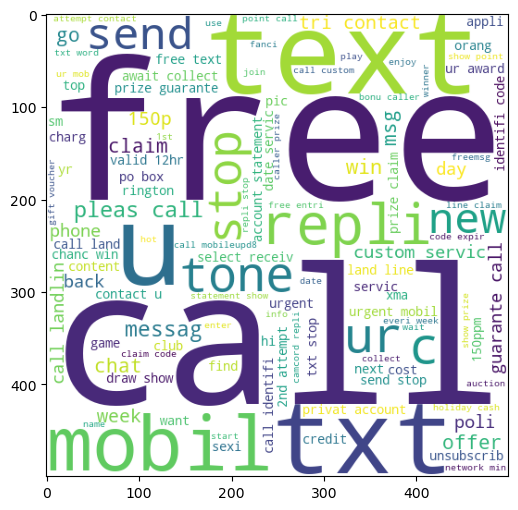

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
# adding all the words in the spam data into a list
spam_corpus = []
for msg in df[df['target'] == 1]['new_text']:
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


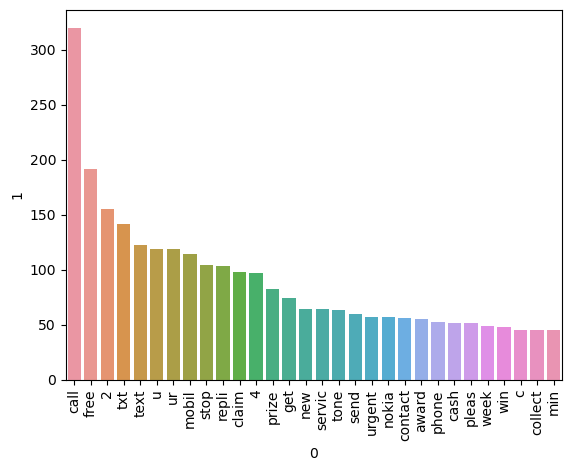

In [39]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

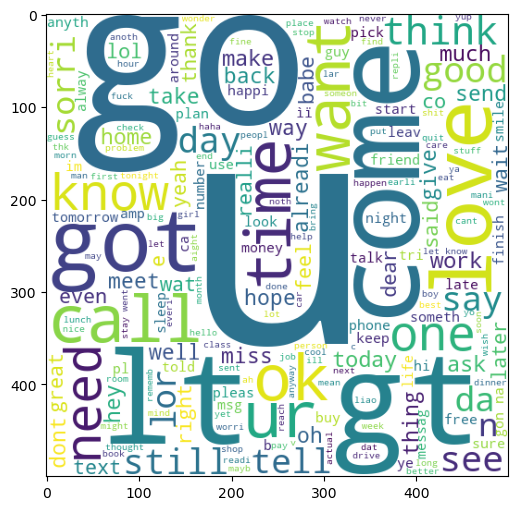

In [40]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 0]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [41]:
# adding all the words in the ham data into a list
spam_corpus = []
for msg in df[df['target'] == 0]['new_text']:
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


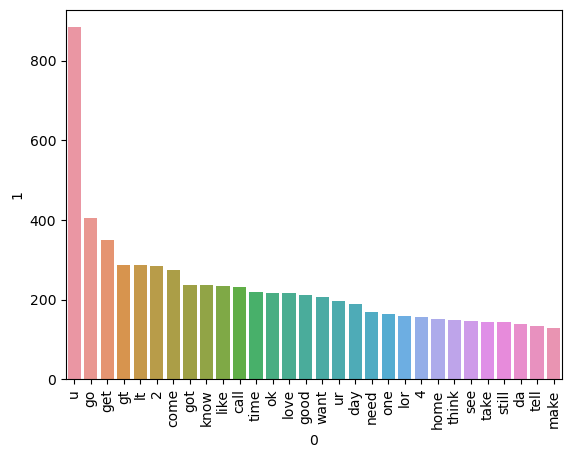

In [42]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [43]:
# Text Vectorization
# using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X =cv.fit_transform(df['new_text']).toarray()

In [58]:
y = df['target']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print('precision-',precision_score(y_test,y_pred1))

accuracy- 0.8800773694390716
[[792 104]
 [ 20 118]]
precision- 0.5315315315315315


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('precision-',precision_score(y_test,y_pred2))

accuracy- 0.9642166344294004
[[871  25]
 [ 12 126]]
precision- 0.8344370860927153


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print('precision-',precision_score(y_test,y_pred3))

accuracy- 0.8800773694390716
[[792 104]
 [ 20 118]]
precision- 0.5315315315315315


In [64]:
#Text vectorisation
#using TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X =tfidf.fit_transform(df['new_text']).toarray()
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print('precision-',precision_score(y_test,y_pred1))

accuracy- 0.8694390715667312
[[788 108]
 [ 27 111]]
precision- 0.5068493150684932


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('precision-',precision_score(y_test,y_pred2))

accuracy- 0.9709864603481625
[[896   0]
 [ 30 108]]
precision- 1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print('precision-',precision_score(y_test,y_pred3))

accuracy- 0.8694390715667312
[[788 108]
 [ 27 111]]
precision- 0.5068493150684932


In [70]:
# therfore we have, highest accuracy and precision
#for bag of words, mnb model accuracy=0.96 ,precision=0.83
#for tfidf,mnb model accuracy=0.97 ,precision=1
#NOTE-here precision is more driving factor then accuracy. accuracy is considered upto some extent when difference between accuracy is very high

In [71]:
# Some other ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [81]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)
cv.best_params_

C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\debas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {'SVC' : svc,'KN' : knc,'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc} 

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    Recall=recall_score(y_test,y_pred)
    F1_score=f1_score(y_test,y_pred)
    
    return accuracy,precision,Recall,F1_score

In [76]:
accuracy_scores = []
precision_scores = []
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall - ",current_recall)
    print("f1-score - ",current_f1_score)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)
    

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
recall -  0.8405797101449275
f1-score -  0.9027237354085604
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
recall -  0.2898550724637681
f1-score -  0.44943820224719105
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
recall -  0.782608695652174
f1-score -  0.878048780487805
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
recall -  0.5942028985507246
f1-score -  0.6861924686192469
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
recall -  0.7101449275362319
f1-score -  0.8200836820083682
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
recall -  0.8260869565217391
f1-score -  0.8976377952755905


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1_Score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_Score
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.974855,0.982759,0.826087,0.897638
0,SVC,0.975822,0.974790,0.840580,0.902724
4,LR,0.958414,0.970297,0.710145,0.820084
3,DT,0.927466,0.811881,0.594203,0.686192


Here we can see the naive bayes performs the best,followed by random forest. since therir accuracy is same priority is given precision.In KN the accuracy is lower so it is not considered for comparing with the other 2

In [78]:
x=np.arange(start=0,stop=7,step=2)
y1=[0.90,1.00,0.29,0.45]
y2=[0.97,1.00,0.78,0.88]
y3=[0.97,0.98,0.83,0.90]
y4=[0.97,0.97,0.84,0.90]
y5=[0.96,0.97,0.71,0.82]
y6=[0.93,0.82,0.59,0.69]
width=0.2

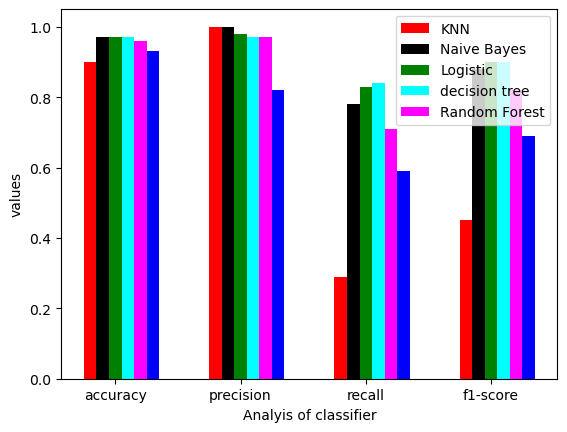

In [79]:
plt.bar(x-0.4,y1,width,color='red')
plt.bar(x-0.2,y2,width,color='black')
plt.bar(x,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')
plt.bar(x+0.4,y5,width,color='magenta')
plt.bar(x+0.6,y6,width,color='blue')

plt.xticks(x,['accuracy','precision','recall','f1-score'])
plt.xlabel("Analyis of classifier")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree","Random Forest"])


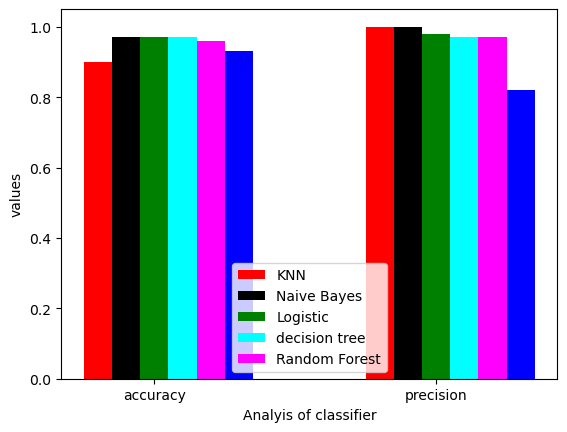

In [80]:
x=np.arange(start=0,stop=3,step=2)
y1=[0.90,1.00]
y2=[0.97,1.00]
y3=[0.97,0.98]
y4=[0.97,0.97]
y5=[0.96,0.97]
y6=[0.93,0.82]
width=0.2
plt.bar(x-0.4,y1,width,color='red')
plt.bar(x-0.2,y2,width,color='black')
plt.bar(x,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')
plt.bar(x+0.4,y5,width,color='magenta')
plt.bar(x+0.6,y6,width,color='blue')

plt.xticks(x,['accuracy','precision'])
plt.xlabel("Analyis of classifier")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree","Random Forest"])


things to do-
make balanced data,
preprudding by cross value


# using undersampling

In [109]:
#making two dataframes
class_0=df[df['target']==0]
class_1=df[df['target']==1]

In [110]:
zero=class_0.sample(n=653,random_state=2)
zero.head()

,target,text,num_characters,num_words,num_sentences,new_text
3183,0,good morning pookie pie! lol hope i didn't wak...,52,13,2,good morn pooki pie lol hope wake u
2677,0,where in abj are you serving. are you staying ...,64,15,2,abj serv stay dad alon
1109,0,s s..first time..dhoni rocks...,31,9,1,first time dhoni rock
2136,0,well done and ! luv ya all,27,7,2,well done luv ya
4053,0,dont make ne plans for nxt wknd coz she wants ...,69,16,1,dont make ne plan nxt wknd coz want us come ok


In [118]:
class_1.head()

,target,text,num_characters,num_words,num_sentences,new_text
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,freemsg hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,winner!! as a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,had your mobile 11 months or more? u r entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"six chances to win cash! from 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...


In [119]:
#contatenating tew data frames
frames = [zero,class_1]
dataset = pd.concat(frames)
dataset.head()

,target,text,num_characters,num_words,num_sentences,new_text
3183,0,good morning pookie pie! lol hope i didn't wak...,52,13,2,good morn pooki pie lol hope wake u
2677,0,where in abj are you serving. are you staying ...,64,15,2,abj serv stay dad alon
1109,0,s s..first time..dhoni rocks...,31,9,1,first time dhoni rock
2136,0,well done and ! luv ya all,27,7,2,well done luv ya
4053,0,dont make ne plans for nxt wknd coz she wants ...,69,16,1,dont make ne plan nxt wknd coz want us come ok


# Data preprocessing

In [120]:
# transforming to lower case
dataset['text'] = dataset['text'].apply(lambda x:x.lower())

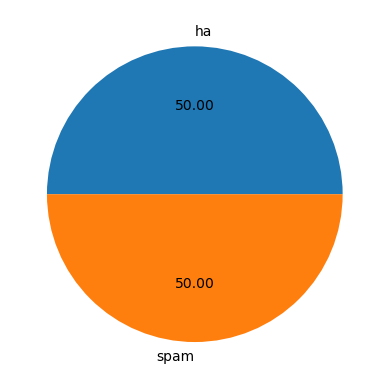

In [121]:
plt.pie(dataset['target'].value_counts(), labels=['ha','spam'],autopct="%0.2f")
plt.show()

In [131]:
dataset

,target,text,num_characters,num_words,num_sentences,new_text
3183,0,good morning pookie pie! lol hope i didn't wak...,52,13,2,good morn pooki pie lol hope wake u
2677,0,where in abj are you serving. are you staying ...,64,15,2,abj serv stay dad alon
1109,0,s s..first time..dhoni rocks...,31,9,1,first time dhoni rock
2136,0,well done and ! luv ya all,27,7,2,well done luv ya
4053,0,dont make ne plans for nxt wknd coz she wants ...,69,16,1,dont make ne plan nxt wknd coz want us come ok
...,...,...,...,...,...,...
5537,1,want explicit sex in 30 secs? ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,asked 3mobile if 0870 chatlines inclu in free ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,had your contract mobile 11 mnths? latest moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,reminder from o2: to get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [123]:
dataset['new_text']=dataset['text'][:]
ps=PorterStemmer()

In [124]:
# Tockenize
def tokenz(text):
    y=[]
    text=nltk.word_tokenize(text) 
    
    # removing special characters
    y = []
    for c in text:
        if c.isalnum():
            y.append(c)
            
    text = y[:]
    y.clear()  
    
    # if(text=y on clearing y ,text also gets cleared)
    
    
    #for removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [125]:
dataset['new_text']=dataset['text'].apply(tokenz)
dataset.head()

,target,text,num_characters,num_words,num_sentences,new_text
3183,0,good morning pookie pie! lol hope i didn't wak...,52,13,2,good morn pooki pie lol hope wake u
2677,0,where in abj are you serving. are you staying ...,64,15,2,abj serv stay dad alon
1109,0,s s..first time..dhoni rocks...,31,9,1,first time dhoni rock
2136,0,well done and ! luv ya all,27,7,2,well done luv ya
4053,0,dont make ne plans for nxt wknd coz she wants ...,69,16,1,dont make ne plan nxt wknd coz want us come ok


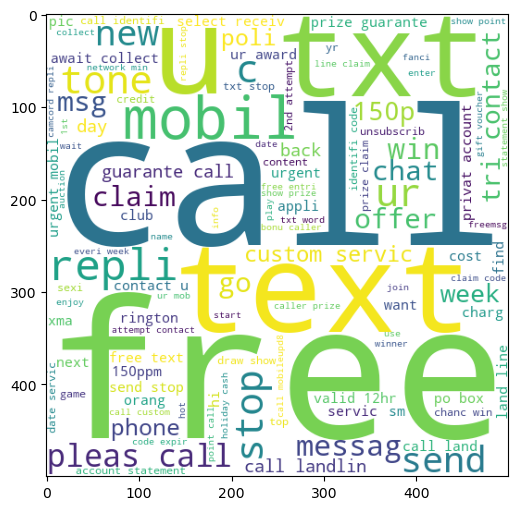

In [126]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(dataset[dataset['target'] == 1]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
# adding all the words in the spam data into a list
spam_corpus1 = []
for msg in dataset[dataset['target'] == 1]['new_text']:
    for word in msg.split():
        spam_corpus1.append(word)
from collections import Counter
Counter(spam_corpus1).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


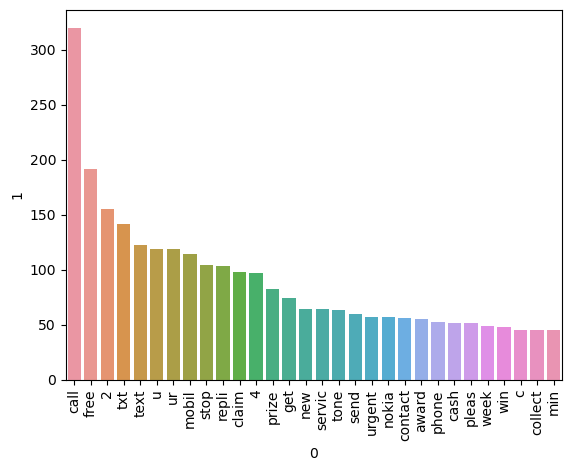

In [129]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

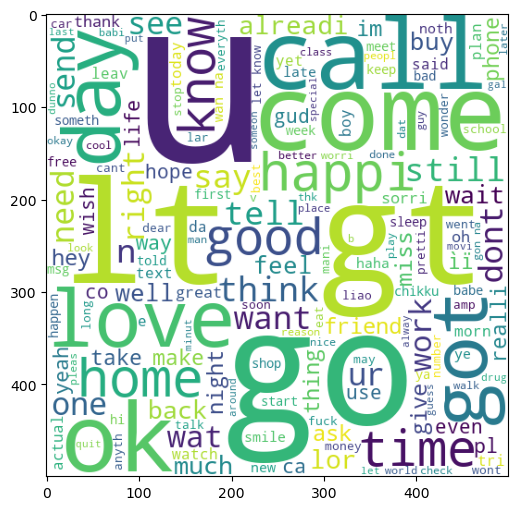

In [132]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(dataset[dataset['target'] == 0]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [137]:
# adding all the words in the ham data into a list
spam_corpus2 = []
for msg in dataset[dataset['target'] == 0]['new_text']:
    for word in msg.split():
        spam_corpus2.append(word)
from collections import Counter
Counter(spam_corpus2).most_common(30)

[('u', 137),
 ('get', 58),
 ('go', 57),
 ('lt', 45),
 ('gt', 45),
 ('2', 38),
 ('like', 35),
 ('come', 34),
 ('day', 34),
 ('know', 32),
 ('call', 31),
 ('ok', 30),
 ('love', 29),
 ('got', 28),
 ('happi', 27),
 ('home', 27),
 ('good', 24),
 ('time', 24),
 ('think', 24),
 ('n', 23),
 ('still', 23),
 ('tell', 23),
 ('dont', 22),
 ('want', 22),
 ('say', 22),
 ('ur', 21),
 ('see', 21),
 ('one', 21),
 ('send', 21),
 ('need', 21)]

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


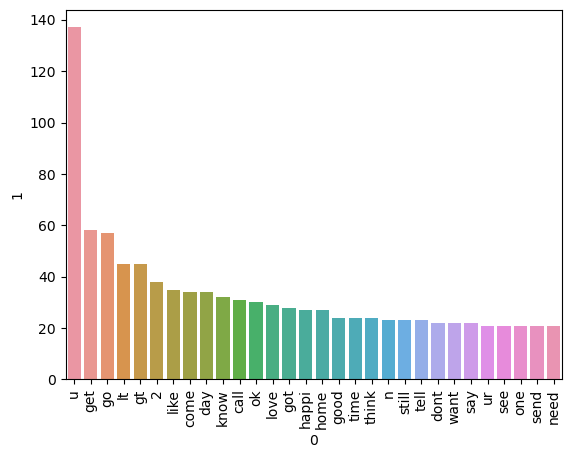

In [139]:
sns.barplot(pd.DataFrame(Counter(spam_corpus2).most_common(30))[0],pd.DataFrame(Counter(spam_corpus2).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4 . Model Building

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X =cv.fit_transform(dataset['new_text']).toarray()
y = dataset['target']

In [141]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=2)

In [142]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [144]:
gnb.fit(X_train1,y_train1)
y_pred22 = gnb.predict(X_test1)
print('accuracy-',accuracy_score(y_test1,y_pred22))
print(confusion_matrix(y_test1,y_pred22))
print('precision-',precision_score(y_test1,y_pred22))

accuracy- 0.916030534351145
[[121   9]
 [ 13 119]]
precision- 0.9296875


In [145]:
mnb.fit(X_train1,y_train1)
y_pred33 = mnb.predict(X_test1)
print('accuracy-',accuracy_score(y_test1,y_pred33))
print(confusion_matrix(y_test1,y_pred33))
print('precision-',precision_score(y_test1,y_pred33))

accuracy- 0.9312977099236641
[[122   8]
 [ 10 122]]
precision- 0.9384615384615385


In [146]:
bnb.fit(X_train1,y_train1)
y_pred4 = gnb.predict(X_test1)
print('accuracy-',accuracy_score(y_test1,y_pred4))
print(confusion_matrix(y_test1,y_pred4))
print('precision-',precision_score(y_test1,y_pred4))

accuracy- 0.916030534351145
[[121   9]
 [ 13 119]]
precision- 0.9296875


In [103]:
#Text vectorisation
#using TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [147]:
X =tfidf.fit_transform(dataset['new_text']).toarray()
y = dataset['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [149]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print('precision-',precision_score(y_test,y_pred1))

accuracy- 0.9045801526717557
[[118  12]
 [ 13 119]]
precision- 0.9083969465648855


In [150]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('precision-',precision_score(y_test,y_pred2))

accuracy- 0.9274809160305344
[[121   9]
 [ 10 122]]
precision- 0.9312977099236641


In [151]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print('accuracy-',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print('precision-',precision_score(y_test,y_pred3))

accuracy- 0.9045801526717557
[[118  12]
 [ 13 119]]
precision- 0.9083969465648855


In [152]:
clfs = {'SVC' : svc,'KN' : knc,'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc} 
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    Recall=recall_score(y_test,y_pred)
    F1_score=f1_score(y_test,y_pred)
    
    return accuracy,precision,Recall,F1_score

In [153]:
accuracy_scores = []
precision_scores = []
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall - ",current_recall)
    print("f1-score - ",current_f1_score)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)

For  SVC
Accuracy -  0.9351145038167938
Precision -  0.96
recall -  0.9090909090909091
f1-score -  0.9338521400778209
For  KN
Accuracy -  0.9007633587786259
Precision -  0.9568965517241379
recall -  0.8409090909090909
f1-score -  0.8951612903225807
For  NB
Accuracy -  0.9274809160305344
Precision -  0.9312977099236641
recall -  0.9242424242424242
f1-score -  0.9277566539923954
For  DT
Accuracy -  0.8625954198473282
Precision -  0.9363636363636364
recall -  0.7803030303030303
f1-score -  0.8512396694214875
For  LR
Accuracy -  0.916030534351145
Precision -  0.9435483870967742
recall -  0.8863636363636364
f1-score -  0.9140625
For  RF
Accuracy -  0.9236641221374046
Precision -  0.9444444444444444
recall -  0.9015151515151515
f1-score -  0.9224806201550387


In [154]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1_Score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_Score
0,SVC,0.935115,0.960000,0.909091,0.933852
1,KN,0.900763,0.956897,0.840909,0.895161
5,RF,0.923664,0.944444,0.901515,0.922481
4,LR,0.916031,0.943548,0.886364,0.914062
3,DT,0.862595,0.936364,0.780303,0.851240
2,NB,0.927481,0.931298,0.924242,0.927757


In [157]:
x=np.arange(start=0,stop=7,step=2)
y1=[0.90,0.96,0.84,0.90]
y2=[0.92,0.93,0.92,0.93]
y3=[0.91,0.94,0.89,0.91]
y4=[0.86,0.94,0.78,0.85]
y5=[0.92,0.94,0.90,0.92]
y6=[0.93,0.96,0.90,0.93]
width=0.2

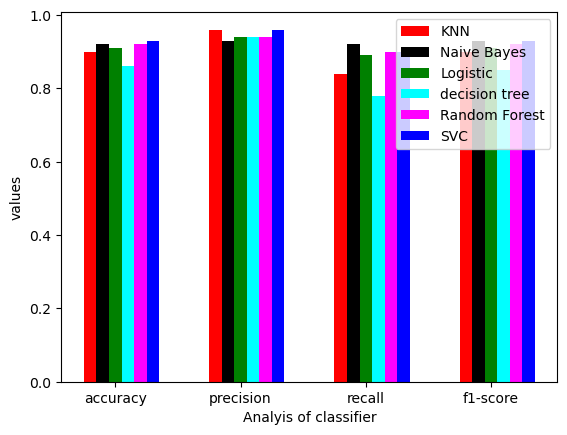

In [158]:
plt.bar(x-0.4,y1,width,color='red')
plt.bar(x-0.2,y2,width,color='black')
plt.bar(x,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')
plt.bar(x+0.4,y5,width,color='magenta')
plt.bar(x+0.6,y6,width,color='blue')

plt.xticks(x,['accuracy','precision','recall','f1-score'])
plt.xlabel("Analyis of classifier")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree","Random Forest","SVC"])


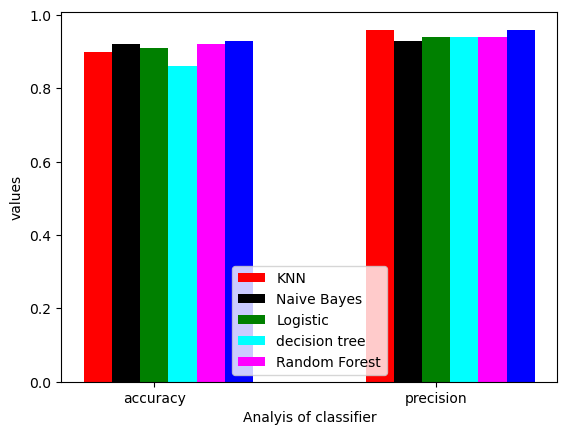

In [159]:
x=np.arange(start=0,stop=3,step=2)
y1=[0.90,0.96]
y2=[0.92,0.93]
y3=[0.91,0.94]
y4=[0.86,0.94]
y5=[0.92,0.94]
y6=[0.93,0.96]
width=0.2
plt.bar(x-0.4,y1,width,color='red')
plt.bar(x-0.2,y2,width,color='black')
plt.bar(x,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')
plt.bar(x+0.4,y5,width,color='magenta')
plt.bar(x+0.6,y6,width,color='blue')

plt.xticks(x,['accuracy','precision'])
plt.xlabel("Analyis of classifier")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree","Random Forest"])
